 #  A Whale off the Port(folio)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.
* `algo_returns.csv`: Contains returns from the in-house trading algorithms.
* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

In [2]:
# Reading whale returns:
whale_returns_data = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls:
whale_returns = whale_returns_df.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns:
algo_returns_data = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls:
algo_returns = algo_returns_df.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices into a DataFrame. 

In [8]:
# Reading S&P 500 Closing Prices:
sp500_history_data = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types:
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types and remove dollar sign:
sp500_history = sp500_history_df["Close"].str.replace("$","").astype("float64")

In [11]:
# Calculate Daily Returns:
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [12]:
# Drop nulls:
sp500_returns = sp500_returns.dropna()
sp500_returns.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [13]:
# Rename `Close` Column to be specific to the portfolio:
sp500_returns = sp500_returns.rename({"Close":"S&P 500"}, axis=1)
sp500_returns.head()

Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns:
portfolio_returns = pd.concat([whale_returns,algo_returns,sp500_returns], axis='columns', join='inner').rename({'Close':'S&P 500'}, axis=1)
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Quantitative Analysis

### Performance Analysis

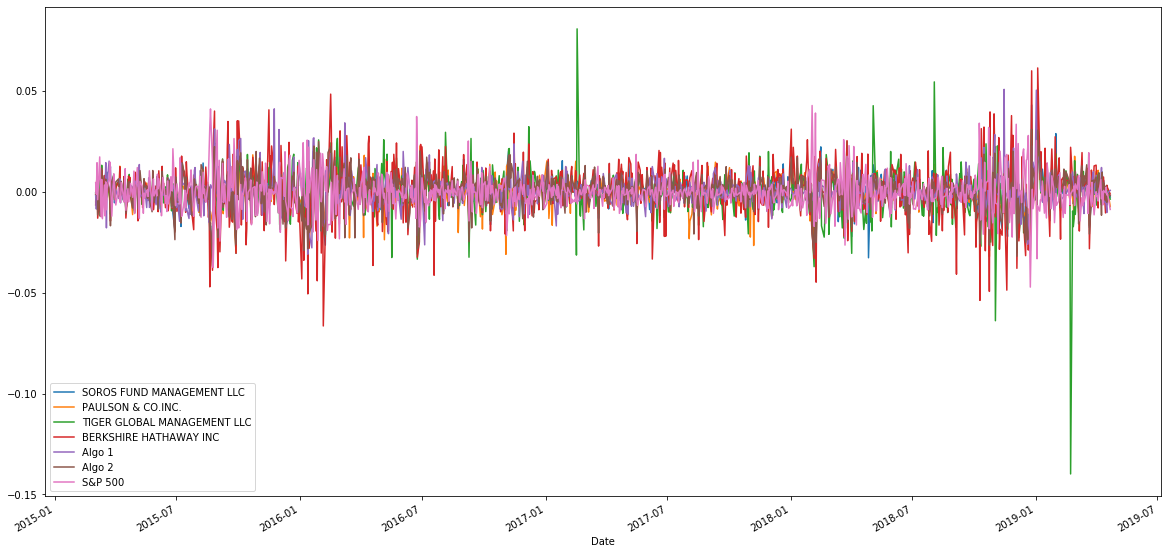

In [15]:
# Plot daily returns of all portfolios:
portfolio_returns.plot(figsize = (20,10))

#### Calculate and Plot Cumulative Returns

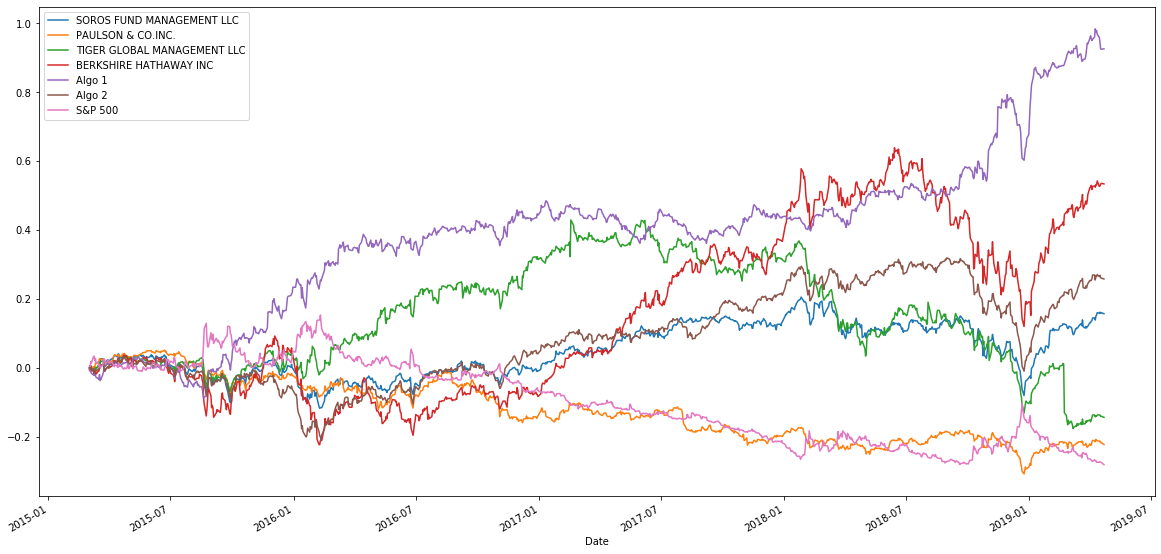

In [16]:
# Calculate cumulative returns of all portfolios:
cumulative_returns = ((1+portfolio_returns).cumprod()-1)

# Plot cumulative returns:
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

We can calculate and visualize portfolio _risk_ by:
1. Creating a box plot for each portfolio. 
2. Calculating the standard deviation of each portfolio.
4. Comparing them to the S&P 500.
5. Calculating the Annualized Standard Deviation.

### Create a box plot for each portfolio


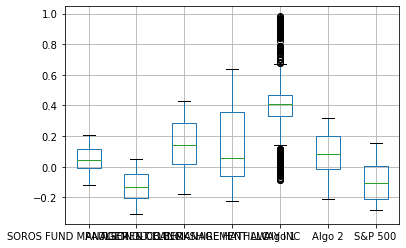

In [17]:
# Box plot to show risk:
cumulative_returns.boxplot(column = ["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC. ","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1","Algo 2","S&P 500"])

### Calculate Standard Deviations

In [18]:
# Formula to calculate the daily standard deviations of all portfolios:
all_returns_std = portfolio_returns.std(axis=0, skipna = True) 
all_returns_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [19]:
## Which portfolios are riskier than the S&P 500? We can display as a true/false output:
sp500_std_value = all_returns_std['S&P 500'].min().round(decimals=6)
risky_portfolios = print(all_returns_std > sp500_std_value)
risky_portfolios

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days in a year):
all_returns_annual_std = all_returns_std * np.sqrt(252)
all_returns_annual_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

### Calculate and plot rolling standard deviation for all portfolios with a 21-day window

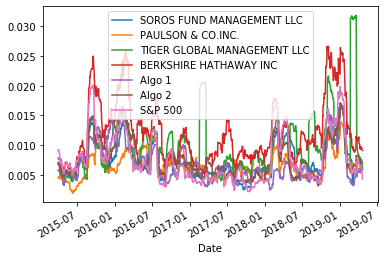

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window:
all_rolling_std = portfolio_returns.rolling(window = 21).std()

# Plot the rolling standard deviation:
all_rolling_std.plot()

### Calculate and plot the correlation

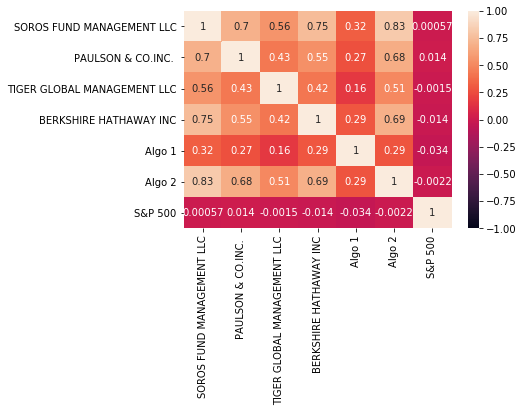

In [22]:
# Calculate the correlation:
correlation = portfolio_returns.corr()

# Display the correlation matrix:
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot the Beta for a chosen portfolio and the S&P 500

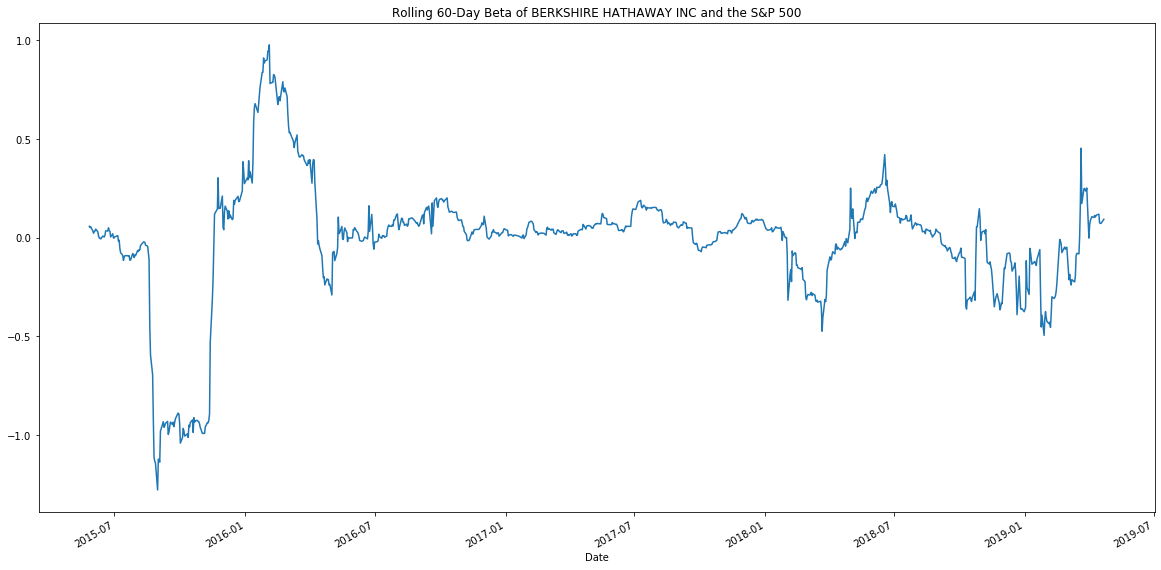

In [24]:
# Calculate covariance of a single portfolio:
covariance = portfolio_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(portfolio_returns["S&P 500"])

# Calculate variance of S&P 500:
variance = portfolio_returns["S&P 500"].var()

# Compute the beta:
beta = (covariance / variance)

# Plot beta trend:
beta.plot(figsize = (20,10), title="Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC and the S&P 500")

## Rolling Statistics: Exponential Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Below, I'll calculate the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window:
portfolio_returns.ewm(halflife=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337
...,...,...,...,...,...,...,...
2019-04-15,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313,-0.001290
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,-0.001174
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,-0.001187


---

# Sharpe Ratios
Investment managers and institutional investors look at the return-to-risk ratio and not just returns alone. After all, if you could invest in one of two portfolios and each offered the same 10% return yet one offered lower risk, you'd take the lower risk...

### Using the daily returns, we can calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios:
annualized_sharpe_ratios = (portfolio_returns.mean() * 252) / (all_returns_std * np.sqrt(252))
annualized_sharpe_ratios.head(7)

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

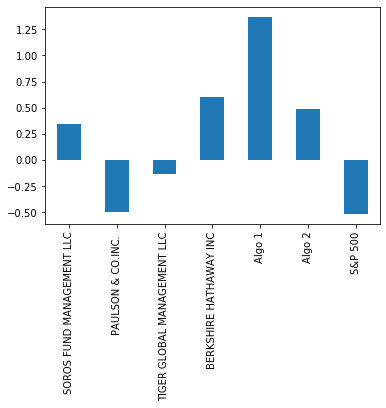

In [27]:
# Visualize sharpe ratio as a bar plot:
annualized_sharpe_ratios.plot.bar()

We can see that Algo 1 outperforms both the market (S&P 500) and the whale portfolios (as well as all others in the chart). Algo 2, however, outperforms the market (S&P 500) but only three out of four of the whale portfolios; Berkshire Hathaway INC barely surpasses Algo 2.

## Now we can build our own stock portfolio, calculate the returns, and compare the results to the Whale Portfolios and S&P 500. 

#### For this solution, I'll fetch 1 year's worth of historic price data from the three companies below listed in the S&P 500 index, then create a DataFrame of the closing prices and dates for each stock.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)
* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)
* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock:
goog_historical_data = Path("./Resources/goog_historical.csv")
goog_historical_df = pd.read_csv(goog_historical_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_historical_df = goog_historical_df.drop(["Symbol"], axis=1)
goog_historical_df = goog_historical_df.rename(columns={'NOCP':'GOOG'})
goog_historical_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [29]:
# Reading data from 2nd stock:
aapl_historical_data = Path("./Resources/aapl_historical.csv")
aapl_historical_df = pd.read_csv(aapl_historical_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_historical_df = aapl_historical_df.drop(["Symbol"], axis=1)
aapl_historical_df = aapl_historical_df.rename(columns={'NOCP':'AAPL'})
aapl_historical_df.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [30]:
# Reading data from 3rd stock:
cost_historical_data = Path("./Resources/cost_historical.csv")
cost_historical_df = pd.read_csv(cost_historical_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_historical_df = cost_historical_df.drop(["Symbol"], axis=1)
cost_historical_df = cost_historical_df.rename(columns={'NOCP':'COST'})
cost_historical_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [31]:
# Combine all stocks in a single DataFrame:
all_stocks_df = pd.concat([goog_historical_df,aapl_historical_df,cost_historical_df], axis="columns", join="inner")
all_stocks_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [32]:
# Reset date index:
all_stocks = all_stocks_df.reset_index()
all_stocks = all_stocks.set_index("Trade DATE")

In [33]:
# Reorganize portfolio data by having a column per symbol:
all_stocks.columns = ["GOOG","AAPL","COST"]
all_stocks.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [34]:
# Calculate daily returns:
portfolio2_returns = all_stocks.pct_change()

# Drop NA's:
portfolio2_returns = portfolio2_returns.dropna()

# Display sample data:
portfolio2_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights:
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return:
weighted_returns = portfolio2_returns.dot(weights)

# Display sample data:
weighted_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join our portfolio returns to the DataFrame containing all portfolio returns

In [36]:
# Join the returns DataFrame to the original returns DataFrame:
all_returns = pd.concat([whale_returns,algo_returns,sp500_returns,portfolio2_returns], axis = "columns", join = "inner").rename({"Close": "S&P 500"}, axis = 1)
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GOOG,AAPL,COST
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.001763,0.002339,-0.000613
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.019431,0.009172,0.002046
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.002348,-0.009246,-0.016255
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.002948,0.006364,-0.004459
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.011469,0.003650,0.003217


In [37]:
# Compare dates where return data exists for all stocks (drop NaN's):
all_returns = all_returns.dropna()
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GOOG,AAPL,COST
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.001763,0.002339,-0.000613
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.019431,0.009172,0.002046
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.002348,-0.009246,-0.016255
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.002948,0.006364,-0.004459
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.011469,0.003650,0.003217


## Re-run risk analysis to see how our portfolio compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`:
portfolio2_annual_std = (all_returns.std() * np.sqrt(252))
portfolio2_annual_std.head(10)

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
S&P 500                        0.152147
GOOG                           0.255365
AAPL                           0.300875
COST                           0.216182
dtype: float64

### Calculate and plot rolling `std` with 21-day window

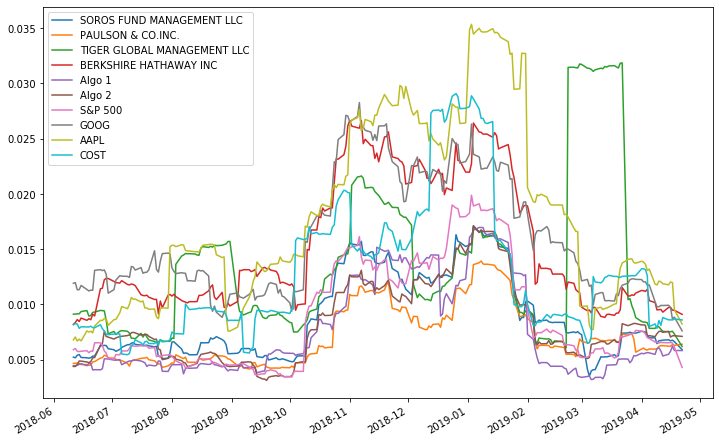

In [47]:
# Calculate rolling standard deviation:
portfolio2_rolling_std = all_returns.rolling(window=21).std()

# Plot the rolling standard deviation:
portfolio2_rolling_std.plot(figsize=(12,8))

### Calculate and plot the correlation

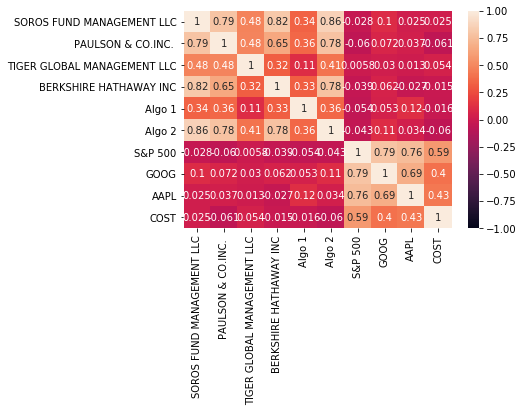

In [40]:
correlation2 = all_returns.corr()
sns.heatmap(correlation2, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for our Portfolio compared to the S&P 500

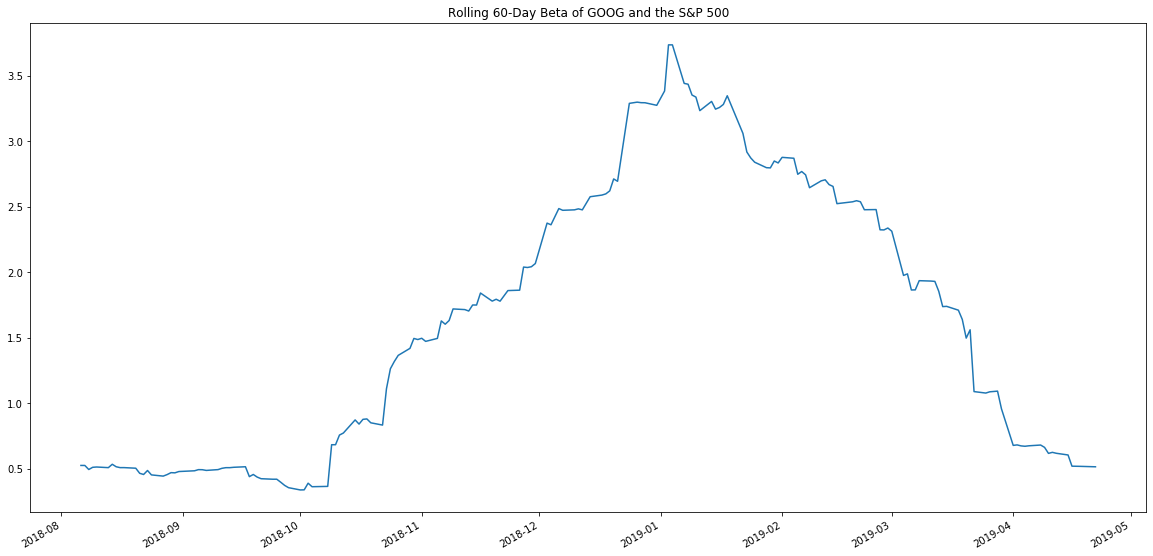

In [41]:
### Calculate and plot Beta
# Calculate covariance of a single portfolio:
covariance2 = all_returns["GOOG"].rolling(window=60).cov(all_returns["S&P 500"])

# Calculate variance of S&P 500:
variance2 = all_returns["S&P 500"].var()

# Computing beta:
beta2 = (covariance2 / variance2)

# Plot beta trend:
beta2.plot(figsize = (20,10), title="Rolling 60-Day Beta of GOOG and the S&P 500")

### Using daily returns, we can calculate and visualize the Sharpe ratios using a bar plot:

In [42]:
# Calculate Annualized Sharpe Ratios:
annualized_sharpe_ratios2 = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
annualized_sharpe_ratios2.head(10)

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
S&P 500                       -0.432942
GOOG                          -0.459788
AAPL                          -0.189008
COST                          -1.008538
dtype: float64

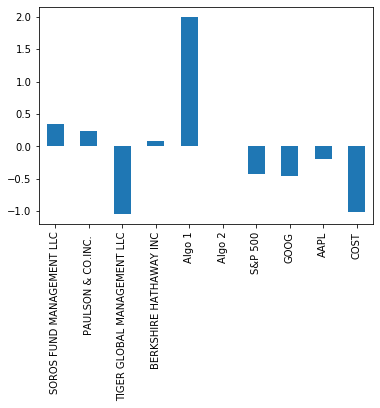

In [43]:
# Visualize the sharpe ratios as a bar plot:
annualized_sharpe_ratios2.plot.bar()